In [1]:
from sklearn.datasets import make_moons
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X, y = make_moons(n_samples=50, noise=0.2, random_state=42)

In [3]:
X.shape

(50, 2)

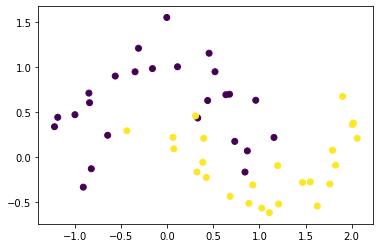

In [4]:
plt.scatter(X[:,0], X[:,1], c = y) 

In [5]:
# Add bias
X = np.hstack([X, np.ones((X.shape[0], 1))])

In [ ]:
X.shape

In [ ]:
#Define a sigmoid function

In [13]:
def sigmoid(x):
    y = 1/(1 + np.exp(-x)) 
    return y

In [ ]:
a = np.array([-10.0, -1.0, 0.0, 1.0, 10.0])
expected = np.array([0.0, 0.27, 0.5, 0.73, 1.0])
assert np.all(sigmoid(a).round(2) == expected)

In [ ]:
# Initialize the weights

w_1 = np.random.rand(X.shape[1],2)
w_2 = np.random.rand(3,1)

In [25]:
def feed_forward(X,weights):
    
    """

    1. Calculate the dot product of X
       and the weights of the first layer.
       

    2. Apply the sigmoid function on the result.

    3. Append an extra column of ones to the result (i.e. the bias).

    4. Calculate the dot product of the previous step
       with the weights of the second (i.e. outer) layer.

    5. Apply the sigmoid function on the result.

    6. Return all intermediate results (i.e. anything that is outputted
       by an activation function).
    """
    output1 = sigmoid(np.dot(X, weights[0]))
    hl_1 = np.hstack([output1, np.ones((output1.shape[0], 1))])
    output2 = sigmoid(np.dot(hl_1, weights[1]))
    
    return output1, output2

In [7]:
def feed_forward_1(X, weights):
    outputs = []
    x_copy = X.copy()
    x_copy = x_copy[:, :-1]
    for w in weights:
        x_inp = np.hstack([x_copy, np.ones((x_copy.shape[0], 1))])
        output = sigmoid(np.dot(x_inp, w))
        outputs.append(output) 
        x_copy = output
    return outputs

In [ ]:
wx = [w_1, w_2]

# Backpropagation

In [67]:
def log_loss(ytrue, ypred):
    loss = -((ytrue*np.log(ypred)) + ((1 - ytrue)*np.log(1 - ypred)))
    return loss



In [68]:
#ytrue = np.array([0.0, 0.0, 1.0, 1.0])
#ypred = np.array([0.01, 0.99, 0.01, 0.99])
#expected = np.array([0.01, 4.61, 4.61, 0.01])

In [69]:
assert np.all(log_loss(ytrue, ypred).round(2) == expected)

NameError: name 'ytrue' is not defined

In [82]:
out1, out2 = feed_forward(X, wx)
ytrue = y.reshape(-1, 1)
ypred = out2.reshape(-1,1)
loss = log_loss(ytrue, ypred) #which arrays do we need to compare?


In [83]:
assert loss.shape == ytrue.shape == ypred.shape

In [75]:
def backprop(weights,output1,output2,ytrue,X_input, LR_O, LR_H):
    #separate learning rates for outer and inner weights.
    wH = weights[0]
    w0 = weights[1]
    #STEP A:
    ytrue = ytrue.reshape(-1, 1)
    error = (output2.reshape(-1,1) - ytrue) * log_loss(ytrue , output2.reshape(-1,1))
    #STEP B: may have to reshape or not
    sig_deriv = output2 * ( 1 - output2)
    #derivative of the sigmoid function with respect to the hidden output * weights
    y_grad = sig_deriv * error
    #STEP C:
    hidden_out_with_bias = np.hstack([output1,np.ones((output1.shape[0] ,1))]) #don't forget the bias!
    delta_wo = np.dot( -y_grad.transpose(), hidden_out_with_bias ) * LR_O
    #and finally, old weights + delta weights -> new weights!
    w0_new = w0 + delta_wo.transpose()
    #STEP D:
    sig_deriv_2 = output1 * ( 1 - output1)
    H_grad = sig_deriv_2 * np.dot(y_grad , w0_new[:2].transpose())
    #exclude the bias (3rd column) of the outer weights, since it is not backpropagated!
    #STEP E:
    delta_wH = np.dot(-H_grad.transpose(), X_input ) * LR_H # with or without bias?
    wH_new = wH + delta_wH.transpose() #old weights + delta weights -> new weights!
    return wH_new, w0_new

In [76]:
# Initialize the weights

w_1 = np.random.rand(X.shape[1],2)
w_2 = np.random.rand(3,1)
wx = [w_1, w_2]

In [77]:
wH_new, w0_new = backprop(wx, out1, out2, y, X, 0.1, 5.0)
new_weights = [wH_new, w0_new]
print(new_weights[0].shape, new_weights[1].shape)

(3, 2) (3, 1)


In [78]:
print(wx[0].shape,wx[1].shape)

(3, 2) (3, 1)


In [79]:
LOSS_VEC = []
for i in range(1000):
    out1, out2 = feed_forward_1(X, wx)
    LOSS_VEC.append(sum(log_loss(y, out2))[0])
    new_weights = backprop(wx, out1, out2, y, X, .1,.1)
    wx = new_weights

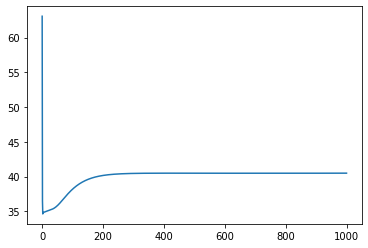

In [80]:
plt.plot(LOSS_VEC)#calculate accuracy

In [81]:
wx

(array([[-0.74407657,  0.45748795],
        [ 1.13559315, -1.34748904],
        [ 0.95249534,  0.59542156]]), array([[-1.87776501],
        [ 3.45000118],
        [-0.86767978]]))